# Introduction to Machine Learning algorithms
January 2024

* Johanna Norell
* Andreas Helgesson
* Axel Blom

# Extracting the data


We upload and then read in the data using the code example provided in the assignment instructions

In [ ]:
from google.colab import files
# Upload CSV file
uploaded = files.upload()

Saving CTG.csv to CTG.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

# Dummy Classifier

We classify the data using the dummy classifier and use cross validation to compute the accuracy of each fold. We let the mean of these value be our aggregate accuracy score for the dummy classifier.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Classify using dummy classifier, and print out mean cross validation score
clf = DummyClassifier(strategy='most_frequent')
dummy_mean = np.mean(cross_val_score(clf, Xtrain, Ytrain))
print(dummy_mean)

0.7805882352941176


We get an aggregate score of 78.1% accuracy

# Baseline classifiers

We calculate the mean accuracy for each classifier, like in step the previous step, and store the values in an array

In [ ]:
# Tree-based classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Linear classifiers
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Neural network
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# Initialize arrays so that we can plot the results later
labels = ['Dummy','DecisionTree', 'RandomForest', 'GradientBoosting', 'Perceptron', 'LogisticRegression', 'LinearSVC', 'MLP']
accuracy_values = [0,0,0,0,0,0,0,0]

# Classify and save accuracy mean to array for each respective classifier
clf = DummyClassifier(strategy='most_frequent')
accuracy_values[0] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = DecisionTreeClassifier(random_state=0)
accuracy_values[1] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = RandomForestClassifier(random_state=0)
accuracy_values[2] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = GradientBoostingClassifier(random_state=0)
accuracy_values[3] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = Perceptron(random_state=0)
accuracy_values[4] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = LogisticRegression(random_state=0)
accuracy_values[5] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = LinearSVC(random_state=0, C=0.01)
accuracy_values[6] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

clf = MLPClassifier(random_state=0)
accuracy_values[7] = np.mean(cross_val_score(clf, Xtrain, Ytrain))

We visualize the accuracy values to see the highest score:

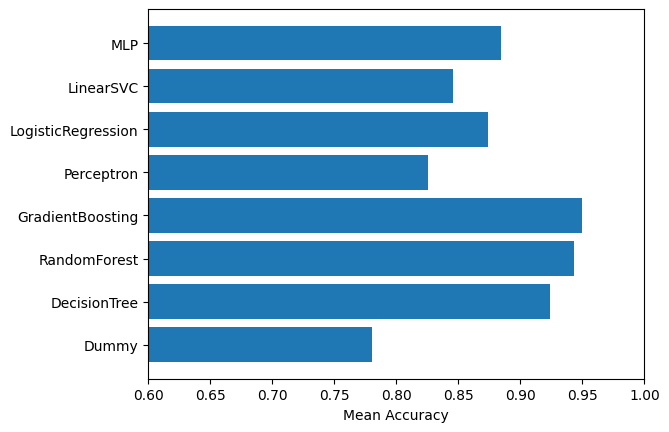

In [ ]:
import matplotlib.pyplot as plt
plt.barh(labels, accuracy_values)
plt.xlabel('Mean Accuracy')
plt.xlim(0.6,1)
plt.show()

We can therefore note that with default settings, GradientBoosting performs best on this specific dataset, with an accuracy of:

In [ ]:
print(labels[np.argmax(accuracy_values)]) # Label that has max score
print(np.max(accuracy_values)) # Max score

GradientBoosting
0.9494117647058824


So, we get a maximum aggregate score of 94.9%, with Gradient Boosting.

We now try to tune the hyperparamaters to acheive the best possible score for each respective classifier. We start with the tree classifiers:

In [ ]:
# Trying to find the best max_depth for all tree classifiers

max_depths = [2,3,4,5,6,7,8,9,10] # Depth values to test

model_class = {
    'DecisionTree': DecisionTreeClassifier,
    'RandomForest': RandomForestClassifier,
    'GradientBoosting': GradientBoostingClassifier
}

best_scores = {}

for model_name, model_class in model_class.items():
  print(model_name)
  best_score = 0
  best_depth = 0
  for depth in max_depths:
    clf = model_class(max_depth = depth)
    mean_score = np.mean(cross_val_score(clf, Xtrain, Ytrain))
    print("Depth: " + str(depth) + ", Mean score: " + str(mean_score))
    if mean_score > best_score:
      best_score = mean_score
      best_depth = depth
  best_scores[model_name] = ('Depth', best_depth, best_score)

DecisionTree
Depth: 2, Mean score: 0.8805882352941176
Depth: 3, Mean score: 0.9141176470588235
Depth: 4, Mean score: 0.9205882352941176
Depth: 5, Mean score: 0.9288235294117648
Depth: 6, Mean score: 0.9341176470588236
Depth: 7, Mean score: 0.9358823529411764
Depth: 8, Mean score: 0.9329411764705882
Depth: 9, Mean score: 0.9294117647058823
Depth: 10, Mean score: 0.9241176470588235
RandomForest
Depth: 2, Mean score: 0.8570588235294118
Depth: 3, Mean score: 0.9047058823529411
Depth: 4, Mean score: 0.9099999999999999
Depth: 5, Mean score: 0.9211764705882353
Depth: 6, Mean score: 0.9282352941176469
Depth: 7, Mean score: 0.9329411764705883
Depth: 8, Mean score: 0.9370588235294118
Depth: 9, Mean score: 0.9376470588235295
Depth: 10, Mean score: 0.9352941176470587
GradientBoosting
Depth: 2, Mean score: 0.9458823529411765
Depth: 3, Mean score: 0.9494117647058824
Depth: 4, Mean score: 0.9470588235294117
Depth: 5, Mean score: 0.9482352941176471
Depth: 6, Mean score: 0.9511764705882353
Depth: 7, Me

We note that the best score achieved with tree classifiers are 93.5% for DecisionTree with depth 8, 93.9% for RandomForest with depth 10, and 95.1% for GradientBoosting with depth 6. Consequently, GradientBoosting still gives the most accurate results. Now we move on to regression classifiers:

In [ ]:
# Trying to find the best max iterations for all regression classifiers

max_iterations = [10,20,30,40,50]

model_class = {
    'Perceptron': Perceptron,
    'LogisticRegression': LogisticRegression,
    'LinearSVC': LinearSVC
}

for model_name, model_class in model_class.items():
  print(model_name)
  best_score = 0
  best_n_iterations = 0
  for iterations in max_iterations:
    clf = model_class(max_iter=iterations)
    mean_score = np.mean(cross_val_score(clf, Xtrain, Ytrain))
    print("Iterations: " + str(iterations) + ", Mean score: " + str(mean_score))
    if mean_score > best_score:
      best_score = mean_score
      best_n_iterations = iterations
  best_scores[model_name] = ('Iterations', best_n_iterations, best_score)

Perceptron
Iterations: 10, Mean score: 0.8405882352941176
Iterations: 20, Mean score: 0.8105882352941176
Iterations: 30, Mean score: 0.8505882352941176
Iterations: 40, Mean score: 0.825294117647059
Iterations: 50, Mean score: 0.825294117647059
LogisticRegression
Iterations: 10, Mean score: 0.8188235294117646
Iterations: 20, Mean score: 0.85
Iterations: 30, Mean score: 0.8717647058823529
Iterations: 40, Mean score: 0.8758823529411763
Iterations: 50, Mean score: 0.8758823529411763
LinearSVC
Iterations: 10, Mean score: 0.8441176470588235
Iterations: 20, Mean score: 0.8376470588235293
Iterations: 30, Mean score: 0.7647058823529411
Iterations: 40, Mean score: 0.8105882352941176
Iterations: 50, Mean score: 0.8264705882352941


We note that the best score achieved with regression classifiers are 85.1% for Perceptron with depth 30 iterations, 87.6% for LogisticRegression with 40 iterations, and 85.2% for LinearSVC with 40 iterations. Consequently, GradientBoosting still gives the most accurate results. Lastly, we tune the hyperparameters for the neural network:

In [ ]:
# Trying the best size of the number of hidden layers

hidden_layer_structures = [
    (100),         # 1 layer with 100 neurons
    (200),         # 1 layer with 200 neurons
    (100, 100),     # 2 layers, each with 100 neurons
    (200, 100),     # 2 layers with 200 and 100 neurons
    (200, 200),     # 2 layers with 200 neurons
    (100, 100, 100) # 3 layers, each with 100 neurons
]

best_score = 0

for structure in hidden_layer_structures:
    clf = MLPClassifier(hidden_layer_sizes=structure)
    mean_score = np.mean(cross_val_score(clf, Xtrain, Ytrain))
    print("Hidden layer structure: " + str(structure) + ", Mean Score: " + str(mean_score))
    if mean_score > best_score:
      best_score = mean_score
      best_scores['MLPClassifier'] = ('Structure', structure, best_score)

Hidden layer structure: 100, Mean Score: 0.8735294117647058
Hidden layer structure: 200, Mean Score: 0.8805882352941176
Hidden layer structure: (100, 100), Mean Score: 0.8611764705882354
Hidden layer structure: (200, 100), Mean Score: 0.8641176470588234
Hidden layer structure: (200, 200), Mean Score: 0.8729411764705883
Hidden layer structure: (100, 100, 100), Mean Score: 0.8852941176470589


We note that the best accuracy for the MLPClassifier is 89%, with 3 layers each consisting of 100 neurons (there might be an even better configuration, but this is the best of those tested here). We visualise and compare these tuned models:

In [ ]:
# Save x and y data for plot into arrays
labels = []
accuracy_values = []
for model in best_scores.keys():
  labels.append(model)
  accuracy_values.append(best_scores[model][2])

# Add in dummy classifier as calculated in Task 2
labels.append('DummyClassifier')
accuracy_values.append(0.7805882352941176)

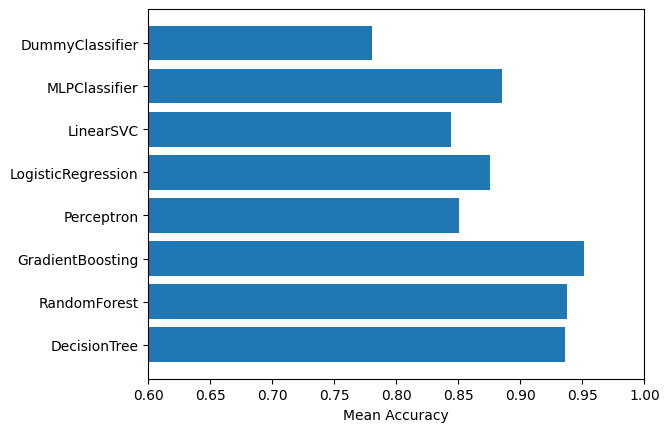

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.barh(labels, accuracy_values)
plt.xlabel('Mean Accuracy')
plt.xlim(0.6,1)
plt.show()

We can note that with hyperparameters tuned, all models achieve better accuracy than with the default settings. We also see that the performance is more even between the different models. GradientBoosting still performs best on this specific dataset, however, with an accuracy of:

In [ ]:
print(labels[np.argmax(accuracy_values)]) # Label that has max score
print(np.max(accuracy_values)) # Max score

GradientBoosting
0.9511764705882353


95.1%

#Training the classif

In [ ]:
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(max_depth=6)
clf.fit(Xtrain, Ytrain) # Train on entire training set
Yguess = clf.predict(Xtest)ier # Predict on testing data
print(accuracy_score(Ytest, Yguess)) # Print accuracy

0.931924882629108


When trained on the whole training set and evaluated on the held-out test data, Gradient Boosting achieves a mean accuracy score of 93.2%.

The prediction model for the Gradient Boosting Classifier algorithm is an ensemble of decision trees. It trains iteratively where each new model corrects the previous model, starting with multiple (an ensemble) of very bad trees and then combine these to become more and more accurate (hence the Boosting name).

Because of it being an ensemble, it is not very easy to interpret they way the trained model makes its predictions, in contrast to the Decision Tree Classifier in Task 2 which can be easily visualized. However, Gradient Boosting is in this case more accurate, which we will see later.

# Implemeting tree classifier

In [ ]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id

    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [ ]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [ ]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)
        self.root = self.make_tree(X, Y, self.max_depth)

    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph

    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)

    # This is the recursive training
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))

        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)

    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]

    # The following three methods need to be implemented by the classification and regression subclasses.

    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [ ]:
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion

    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]

    # Checks whether a set of output values is homogeneous. In the classification case,
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1

    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

In [ ]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high

##Evaluating tree classifier

In [ ]:
scores = []

for i in range(20):
  clf = TreeClassifier(max_depth=i)
  tree_classifier_mean = np.mean(cross_val_score(clf, Xtrain, Ytrain))
  scores.append(tree_classifier_mean)

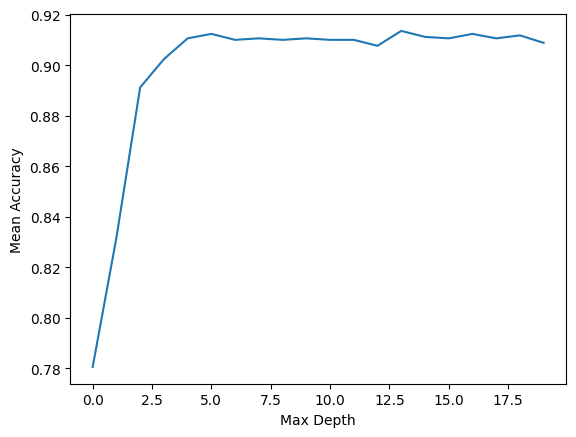

In [ ]:
# Visualize to find maximum
plt.plot(scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean Accuracy')
plt.show()

We clearly see in the above graph that the mean accuracy levels off at max_depth = 5, we therefore select that value as our max depth. Due to noise we might have a higher accuracy value at greater max_depth, but increasing max_depth also increases the risk of overfitting the model. With 5 selected as our value, we get an accuracy of:

In [ ]:
clf = TreeClassifier(max_depth=5)
clf.fit(Xtrain, Ytrain) # Train on entire training data
Yguess = clf.predict(Xtest) # Make prediction on entire test data
print(accuracy_score(Ytest, Yguess)) # Print out accuracy

0.8896713615023474


We get an accuracy of 89.0%, so not quite as good as Gradient Boosting. However, as previously mentioned, this TreeClassifier does have the advantage of being easily visualized and human readable. We draw the tree:

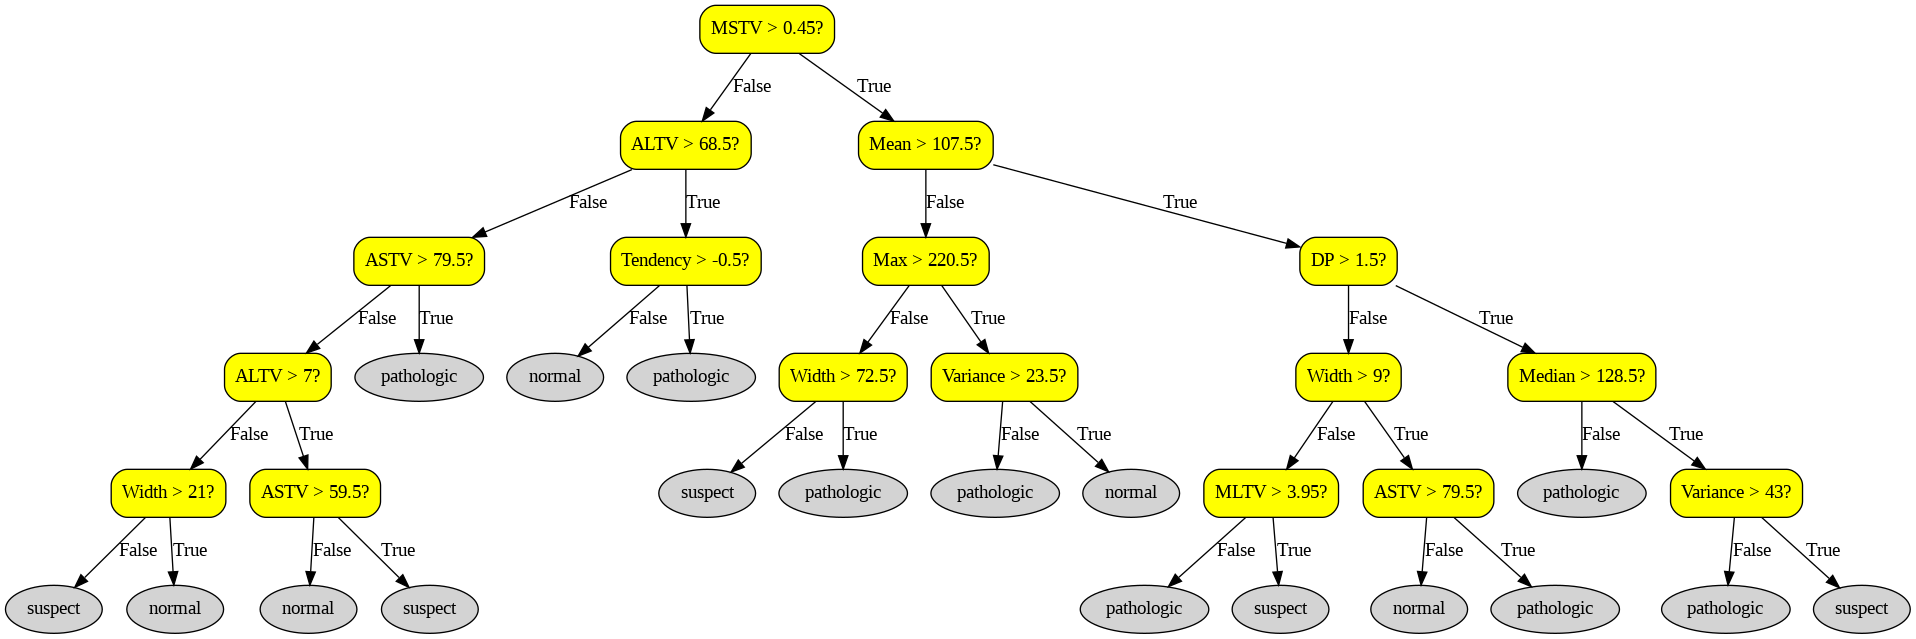

In [ ]:
#clf.draw_tree()

# In order to avoid showing an SVG, which makes the notebook difficult to export to PDF, we convert to png and then show the tree
from IPython.display import Image
clf.draw_tree().render(filename='tree', format='png', view=False)
Image(filename='tree.png')

# Training on more complex data

Upload the data to Colab:

In [ ]:
uploaded = files.upload() # Upload zipped version as Colab is really slow otherwise
!unzip sberbank.zip # Unzip using shell

Saving sberbank.zip to sberbank.zip
Archive:  sberbank.zip
  inflating: sberbank.csv            


In [ ]:
# Read the CSV file using Pandas.
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

##Dummy classifier
Establishing a baseline with a dummy classifier

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
D_reg = DummyRegressor()
scores = cross_validate(D_reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
mean_score = np.mean(scores['test_score'])
print(mean_score)

-0.38925247260237567


The Dummy regressor has a mean negative mean squared error of -0.39. We now test the different models with default settings:

##Evaluating regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

LR_reg = LinearRegression()
R_reg = Ridge()
L_reg = Lasso()
DT_reg = DecisionTreeRegressor()
RF_reg = RandomForestRegressor()
GB_reg = GradientBoostingRegressor()
MLP_reg = MLPRegressor()

all_models = {
    'LinearRegression': LR_reg,
    'Ridge': R_reg,
    'Lasso': L_reg,
    'DecisionTree': DT_reg,
    'RandomForest': RF_reg,
    'GradientBoosting': GB_reg,
    'MLP': MLP_reg
}

for model_name, model in all_models.items():
  scores = cross_validate(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')
  print(str(model_name) + ", Mean Score: " + str(np.mean(scores['test_score'])))

LinearRegression, Mean Score: -0.30139865887671935
Ridge, Mean Score: -0.3013978423217977
Lasso, Mean Score: -0.3010470671748872
DecisionTree, Mean Score: -0.5277663295892635
RandomForest, Mean Score: -0.283861024581225
GradientBoosting, Mean Score: -0.26453137811045696
MLP, Mean Score: -1061.6478297818444


Because we are using the negative mean squared error, a larger value means better performance. Hence, GradientBoosting is also here the best performing model. We now try twaking the hyperparameters to improve the performance.

According to theory, the hyperparameter tuning will not have a great effect on Linear Regression, so this will be omitted.

##Iterating over hyperparameters

In [ ]:
# Trying to find the best alpha values for Ridge and Lasso

best_scores = {}

alphas = [0.1,0.5,1,1.5,2]

model_class = {
    'Ridge': Ridge,
    'Lasso': Lasso
}

for model_name, model_class in model_class.items():
  print(model_name)
  best_score = -1
  best_alpha=0
  best_n_iterations = 0
  for test_alpha in alphas:
    reg = model_class(alpha=test_alpha)
    scores = cross_validate(reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    print("Alpha: " + str(test_alpha) + ", Mean score: " + str(np.mean(scores['test_score'])))
    if np.mean(scores['test_score']) > best_score:
      best_score = np.mean(scores['test_score'])
      best_alpha = test_alpha
  best_scores[model_name] = ('Alpa', best_alpha, best_score)

Ridge
Alpha: 0.1, Mean score: -0.30139857717133256
Alpha: 0.5, Mean score: -0.30139825046069646
Alpha: 1, Mean score: -0.3013978423217977
Alpha: 1.5, Mean score: -0.3013974344598243
Alpha: 2, Mean score: -0.30139702687458214
Lasso
Alpha: 0.1, Mean score: -0.2981786493131545
Alpha: 0.5, Mean score: -0.29934281057877865
Alpha: 1, Mean score: -0.3010470671748872
Alpha: 1.5, Mean score: -0.30391116592741213
Alpha: 2, Mean score: -0.3079351068363533


In [ ]:
# Trying to find the best max_depth for all tree regressors

max_depths = [2,3,4,5,6,7,8,9,10]

model_class = {
    'DecisionTree': DecisionTreeRegressor,
    'RandomForest': RandomForestRegressor,
    'GradientBoosting': GradientBoostingRegressor
}

for model_name, model_class in model_class.items():
  print(model_name)
  best_score = -1
  best_depth = 0
  for depth in max_depths:
    reg = model_class(max_depth=depth)
    scores = cross_validate(reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
    print("Depth: " + str(depth) + ", Mean score: " + str(np.mean(scores['test_score'])))
    if np.mean(scores['test_score']) > best_score:
      best_score = np.mean(scores['test_score'])
      best_depth = depth
  best_scores[model_name] = ('Depth', best_depth, best_score)


DecisionTree
Depth: 2, Mean score: -0.3043367605680857
Depth: 3, Mean score: -0.2933731838404955
Depth: 4, Mean score: -0.2855494394343463
Depth: 5, Mean score: -0.28283513550755246
Depth: 6, Mean score: -0.2803035200594749
Depth: 7, Mean score: -0.28279205745519137
Depth: 8, Mean score: -0.2881659118153143
Depth: 9, Mean score: -0.2987772242687779
Depth: 10, Mean score: -0.3073409024466628
RandomForest
Depth: 2, Mean score: -0.29769550333025296
Depth: 3, Mean score: -0.28517675402185855
Depth: 4, Mean score: -0.27977562081289514
Depth: 5, Mean score: -0.27553630119242845
Depth: 6, Mean score: -0.2716895137385978
Depth: 7, Mean score: -0.2691612412739116
Depth: 8, Mean score: -0.26728752420310276
Depth: 9, Mean score: -0.26631603650287566
Depth: 10, Mean score: -0.2661983322967957
GradientBoosting
Depth: 2, Mean score: -0.26912004394093325
Depth: 3, Mean score: -0.2645813150759141
Depth: 4, Mean score: -0.26008898926548696
Depth: 5, Mean score: -0.258371460508227
Depth: 6, Mean score: 

In [ ]:
# Tweaking the MLP model

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from statistics import mean

# Define various configurations for hidden_layer_sizes and activation
hidden_layer_configurations = [
    (50,), (100,),          # 1 layer with 50 and 100 neurons
    (50, 50), (100, 100),   # 2 layers with 50 and 100 neurons each
]

hidden_layer_structures = [
    (50),         # 1 layer with 50 neurons
    (100),         # 1 layer with 100 neurons
    (50, 50),     # 2 layers, each with 50 neurons
    (100, 100)     # 2 layers with 100 neurons
]

activation_functions = ['logistic', 'tanh', 'relu']

best_configuration = {}
best_score = -1

for hidden_layers in hidden_layer_structures:
    for activation in activation_functions:
        model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation)
        scores = cross_val_score(model, Xtrain, Ytrain, scoring='neg_mean_squared_error')
        mean_score = np.mean(scores)
        print("Config: " + str(hidden_layers) + ", Activation: " + str(activation) + ", Mean score: " + str(mean_score))

        # Check if this configuration is better
        if mean_score > best_score:
            best_score = mean_score
            best_configuration = {
                'hidden_layer_sizes': hidden_layers,
                'activation': activation
            }
best_scores['MLP Regressor'] = ('Activation Function & Layer Structure', best_configuration, best_score)

Config: 50, Activation: logistic, Mean score: -0.3849018256145543
Config: 50, Activation: tanh, Mean score: -0.4051159410115666
Config: 50, Activation: relu, Mean score: -147.39352523741067
Config: 100, Activation: logistic, Mean score: -0.38365355502700493
Config: 100, Activation: tanh, Mean score: -0.3846310018200197
Config: 100, Activation: relu, Mean score: -5261.235768396296
Config: (50, 50), Activation: logistic, Mean score: -0.38910528790661714
Config: (50, 50), Activation: tanh, Mean score: -0.38288994875598614
Config: (50, 50), Activation: relu, Mean score: -25921.545115350847
Config: (100, 100), Activation: logistic, Mean score: -0.38388302198419944
Config: (100, 100), Activation: tanh, Mean score: -0.3815363493432388
Config: (100, 100), Activation: relu, Mean score: -31430.227403336827


With all models optimized, we graph their performance and pick out the best performing model. This code is the same as used in Task 1.

In [ ]:
# Save x and y data for plot into arrays
labels = []
accuracy_values = []
for model in best_scores.keys():
  labels.append(model)
  accuracy_values.append(best_scores[model][2])

# Add in dummy regressor value
labels.append('DummyRegressor')
accuracy_values.append(-0.38925247260237567)

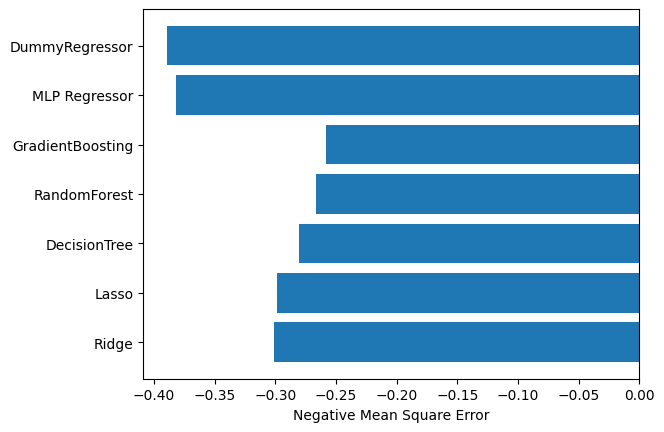

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.barh(labels, accuracy_values)
plt.xlabel('Negative Mean Square Error')
plt.show()

In [ ]:
print("Best scores and depths for each model:")
for model_name, (parameter_type, parameter, score) in best_scores.items():
    print(model_name + ": " + str(parameter_type) + ": " + str(parameter) + ", Score: " + str(score))

Best scores and depths for each model:
Ridge: Alpa: 2, Score: -0.30139702687458214
Lasso: Alpa: 0.1, Score: -0.2981786493131545
DecisionTree: Depth: 6, Score: -0.2803035200594749
RandomForest: Depth: 10, Score: -0.2661983322967957
GradientBoosting: Depth: 5, Score: -0.258371460508227
MLP Regressor: Activation Function & Layer Structure: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh'}, Score: -0.3815363493432388



We note that GradientBoosting, again, performs best. We therefore select GradientBoosting to train on the whole dataset. A description of this model was given in previous tasks.

##Evaluating on data

In [ ]:
from sklearn.metrics import mean_squared_error

GB_reg = GradientBoostingRegressor(max_depth=5)
GB_reg.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, GB_reg.predict(Xtest))

0.2638205281994403

We get a mean squared error of 0.264 for GradientBoosting at a depth of 5

# Implemeting tree regressor

In [ ]:
from sklearn.base import RegressorMixin

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, max_depth=10, threshold=0.01):
        super().__init__(max_depth)
        self.threshold = threshold

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value.
    def get_default_value(self, Y):
        return np.mean(Y)

    # Checks whether a set of output values is homogeneous.
    # As told in the instroctuions, the variances is checked in comparison to the threshold value
    def is_homogeneous(self, Y):
        return np.var(Y) < self.threshold

    # Helper function, variance reduction calculated according to definition in instructions
    def var_red_scorer(self, var_tot, low_n, low_var, high_n, high_var):
      tot_n = low_n+high_n
      return var_tot - (high_n*high_var + low_n*low_var)/ tot_n

    # Finds the best splitting point for a given feature.
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        #Total variance, needed for varaince reduction scorer
        tot_var = np.var(Y)

        low_y_sum = 0
        low_y_sum_sq = 0
        high_y_sum = np.sum(Y)
        high_y_sum_sq = np.sum(np.square(Y))

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]

            # Variances update for each split
            low_n = len(Y[:i+1])
            high_n = len(Y[i+1:])
            low_y_sum += y_i
            low_y_sum_sq +=(y_i**2)
            high_y_sum -= y_i
            high_y_sum_sq -= (y_i**2)

            low_var = low_y_sum_sq/low_n - (low_y_sum**2)/(low_n**2)
            high_var = high_y_sum_sq/high_n - (high_y_sum**2)/(high_n**2)

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.var_red_scorer(tot_var, i+1, low_var, n-i-1, high_var)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point

## Visulizing the data


Generate the sample data and plot it:

In [ ]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

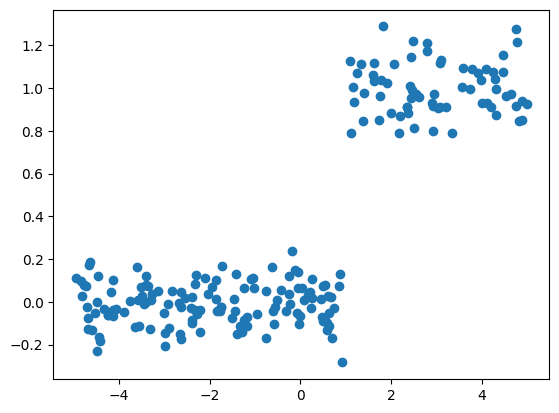

In [ ]:
X, Y = make_some_data(200)
plt.scatter(X,Y)

The sample data looks good, so we now try to train TreeRegressor on it. We saw in Task 3 that sklearn's DecisionTreeRegressor had the best score when depth was 6, although that was with a different dataset. Nevertheless, we choose 6 as depth and try it out:

In [ ]:
tree_regressor = TreeRegressor(max_depth=6)
tree_regressor.fit(X,Y)

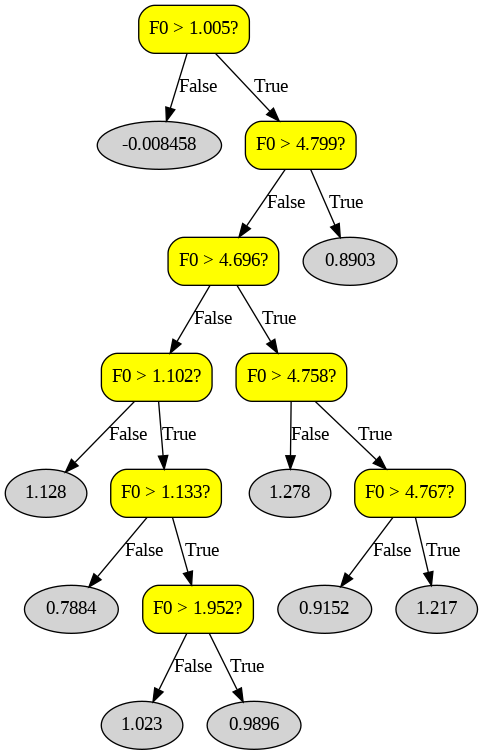

In [ ]:
#tree_regressor.draw_tree()

# In order to avoid showing an SVG, which makes the notebook difficult to export to PDF, we convert to png and then show the tree
from IPython.display import Image
tree_regressor.draw_tree().render(filename='tree', format='png', view=False)
Image(filename='tree.png')

The decision tree does make a lot of sense. With each check, we split the graph up in two halves. The first check, for example, says that if X<=1.005 the Y value should be ~0, so the point will be in the bottom left cluster. For this perticular tree, no further checks are done in that cluster but the top right cluster has much more detail.

If the just change the depth value to be really large, the regression algorithm would still stop because the threshold is met before the max depth is reached.

##Iterating over hyperparameters

We try different values for max depth to find the best value

In [ ]:
best_score = -1
best_depth = 0

for i in range(1,10):
  reg = TreeRegressor(max_depth=i)
  scores = cross_validate(reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
  if np.mean(scores['test_score']) > best_score:
    best_score = np.mean(scores['test_score'])
    best_depth = i

print(best_score)
print(best_depth)

-0.2804881368416489
6


Then, we train on the whole training set and check test on the test data:

In [ ]:
tree_reg = TreeRegressor(max_depth=best_depth)
tree_reg.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, tree_reg.predict(Xtest))

0.28624256155337435

We get a mean squared error of 0.286 when running with a depth of 6. Just for fun, we can also draw this tree:

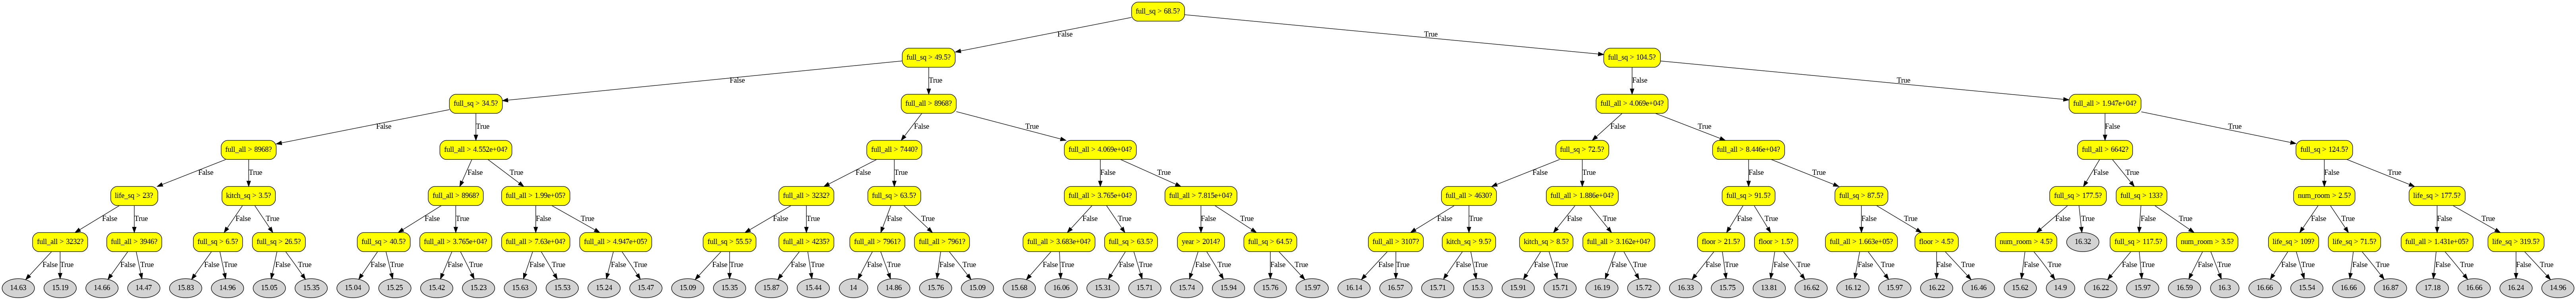

In [ ]:
#tree_reg.draw_tree()

# In order to avoid showing an SVG, which makes the notebook difficult to export to PDF, we convert to png and then show the tree
from IPython.display import Image
tree_reg.draw_tree().render(filename='tree', format='png', view=False)
Image(filename='tree.png')

##Training the regressor

Using the same code as in Task 2, with minor adjustments:

In [ ]:
train_scores = []
test_scores = []

for i in range(0, 13):
  clf = TreeRegressor(max_depth=i)
  clf.fit(Xtrain, Ytrain) # Train on entire training set
  Yguess_train = clf.predict(Xtrain) # Predict on training data
  Yguess_test = clf.predict(Xtest) # Predict on testing data
  train_scores.append(mean_squared_error(Ytrain, Yguess_train)) # Save scores
  test_scores.append(mean_squared_error(Ytest, Yguess_test)) # Save scores

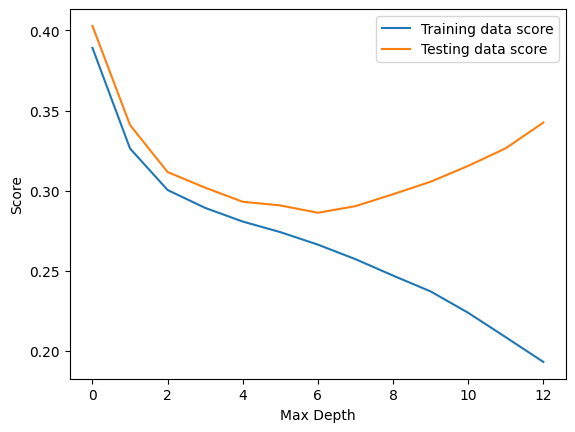

In [ ]:
# Visualize to find maximum
plt.plot(train_scores, label='Training data score')
plt.plot(test_scores, label='Testing data score')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.legend()
plt.show()

Keeping in mind that a smaller score/error means better performande, we can clearly see that the best testing data performance is at a max depth of 6. After this point, testing data scores becomes worse, whild training data scores tends towards 0, a sign of overfitting.

These curves a very reasonable and what we would expect to see.